### **Import Libraries**

In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Installation (prefer 2.19.1 if desired)
#!pip install tensorflow==2.18
from tensorflow import keras
from tensorflow.keras import datasets

from sklearn.metrics import confusion_matrix, classification_report

### **Load Data**

In [5]:
(x_train , y_train) , (x_test , y_test) = datasets.cifar10.load_data()
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

### **Scale & Reshape**

In [6]:
x_train  = x_train / 255
x_test = x_test / 255
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

### **Plot Sample**

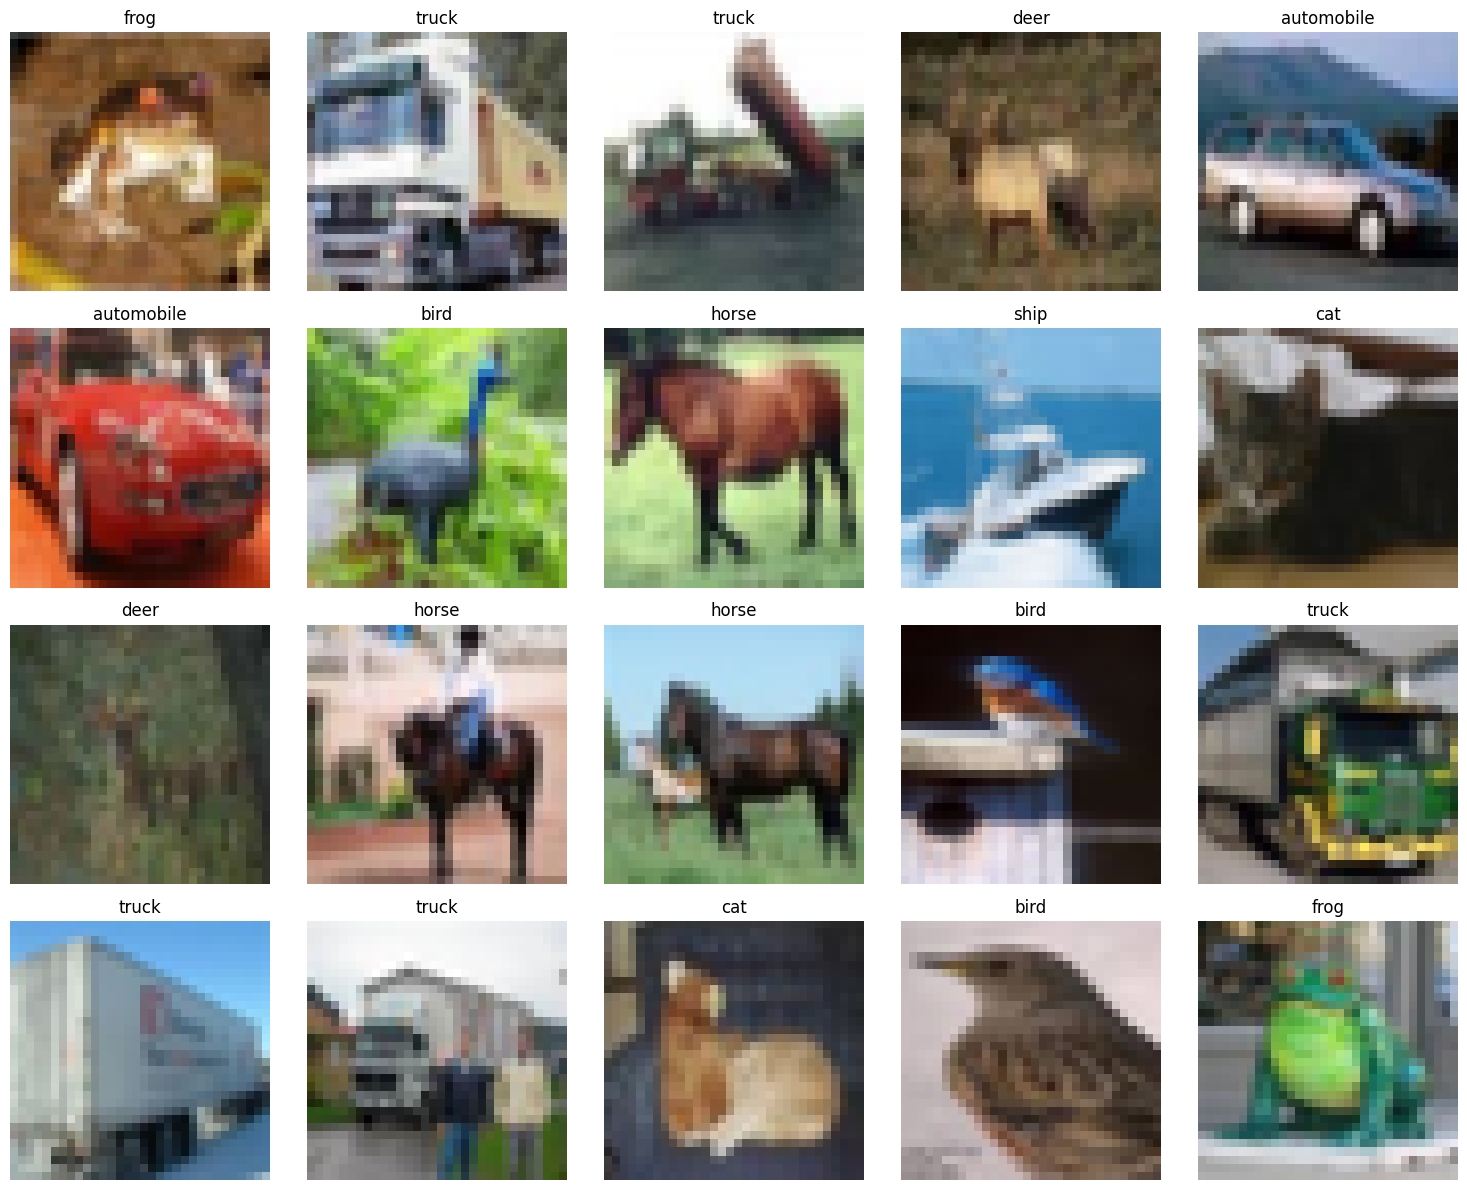

In [21]:
def plot_samples(x, y, start_index, end_index, num_cols=5):
    num_images = end_index - start_index
    num_rows = (num_images + num_cols - 1) // num_cols
    plt.figure(figsize=(num_cols * 3, num_rows * 3))
    for i in range(num_images):
        index = start_index + i
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(x[index])
        plt.title(classes[y[index]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage: Plot the first 10 images from the training set
plot_samples(x_train, y_train, 0, 20)

### **Custom Artificial Neural Network Prediction**

In [ ]:
ann = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

ann.fit(x_train,y_train,epochs=5)

In [ ]:
ann.evaluate(x_test , y_test)

In [ ]:
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('Classification report : \n' , classification_report(y_test , y_pred_classes))

### **Convolution Neural Network Prediction**

In [7]:
cnn = keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 39ms/step - accuracy: 0.3888 - loss: 1.6775
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.5977 - loss: 1.1337
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 38ms/step - accuracy: 0.6623 - loss: 0.9650
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.7036 - loss: 0.8593
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 43ms/step - accuracy: 0.7286 - loss: 0.7849
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 38ms/step - accuracy: 0.7504 - loss: 0.7192
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.7709 - loss: 0.6595
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.7831 - loss: 0.6250
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.8033 - loss: 0.5651
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.8157 - loss: 0.5255


In [10]:
cnn.evaluate(x_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7104 - loss: 0.9521


[0.9566272497177124, 0.704200029373169]

In [16]:
y_pred = cnn.predict(x_test)
y_prediction = [np.argmax(element) for element in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


In [17]:
print(y_prediction[310:316])

[np.int64(8), np.int64(6), np.int64(0), np.int64(5), np.int64(5), np.int64(0)]


In [18]:
y_test[310:316]

array([8, 6, 8, 0, 4, 0], dtype=uint8)

In [34]:
print(classes[y_test[5762]])

airplane


In [35]:
print(classes[y_prediction[5762]])

airplane


In [36]:
print('Classification report : \n' , classification_report(y_test , y_prediction))

Classification report : 
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      1000
           1       0.76      0.87      0.81      1000
           2       0.57      0.62      0.59      1000
           3       0.54      0.49      0.51      1000
           4       0.65      0.65      0.65      1000
           5       0.62      0.63      0.62      1000
           6       0.73      0.81      0.77      1000
           7       0.76      0.75      0.76      1000
           8       0.86      0.77      0.81      1000
           9       0.83      0.72      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

